In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.style as mplstyle
%matplotlib inline
mplstyle.use('fivethirtyeight')

import datetime

In [2]:
from timeseries_regression_simulation import data_generator

# First we simulate the data

**Requirements:**

I need just three columns:

- Zip codes  
- Timestamps  
- Dollars

The zip codes need to be sampled from just a few, maybe 6 different zip codes. I'd like to have a random sample of time stamps. Maybe its possible. And finally a random sample of dollar amounts.

In [3]:
dat = data_generator()
dat.n = 1000

In [4]:
df = dat.get_sample()

In [5]:
df.head()

,Zip,Date,Amount
0,90024,2017-04-18,42.0
1,90024,2017-10-17,141.0
2,90026,2017-10-24,116.0
3,90028,2015-11-21,150.0
4,90028,2017-11-05,68.0


## Then we calculate how many days ago for each record

In [6]:
def days_ago(x):
    delta = datetime.date.today() - x
    return delta.days

In [7]:
df['DaysAgo'] = df['Date'].apply(days_ago)

df.head()

,Zip,Date,Amount,DaysAgo
0,90024,2017-04-18,42.0,212
1,90024,2017-10-17,141.0,30
2,90026,2017-10-24,116.0,23
3,90028,2015-11-21,150.0,726
4,90028,2017-11-05,68.0,11


## Then we look at data from a single zip code

In [8]:
z24 = df[df['Zip'] == 90024]

In [9]:
z24.head()

,Zip,Date,Amount,DaysAgo
0,90024,2017-04-18,42.0,212
1,90024,2017-10-17,141.0,30
8,90024,2017-11-08,12.0,8
15,90024,2017-07-21,139.0,118
16,90024,2017-11-07,55.0,9


## Then we run a regression on `days ago` and `amount`

In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

Let's convert the pd.DataFrame into a numpy array that we can use for modeling. Actually since I have my trusty servant `Patsy` I can skip that step. It will do work on the pd.DataFrame.

In [11]:
#results = smf.ols('y ~ Amount + DaysAgo', data=z24).fit()

So that gave me an error.

    PatsyError: Error evaluating factor: NameError: name 'y' is not defined
        y ~ Amount + DaysAgo
        ^

I'm trying to do a regression with unlabeled data here. Not going to happen. So maybe I'll try something else. How about the average age of addresses within a zip code versus the ... no I don't have enough terms.

How about I just use one term.

In [12]:
results = smf.ols('Amount ~ DaysAgo', data=z24).fit()

In [13]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Amount   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.346
Date:                Thu, 16 Nov 2017   Prob (F-statistic):              0.128
Time:                        21:08:33   Log-Likelihood:                -838.63
No. Observations:                 162   AIC:                             1681.
Df Residuals:                     160   BIC:                             1687.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     59.5337      4.108     14.492      0.0

## So what does this look like?

In [33]:
import seaborn as sns

sns.set(color_codes=True)

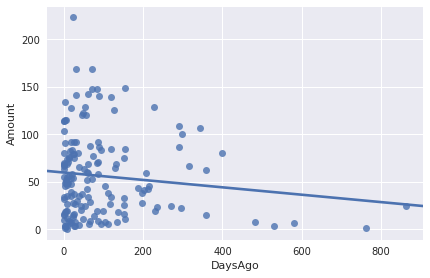

In [36]:
sns.regplot(x=z24['DaysAgo'], y=z24['Amount'], data=z24, ci=False)

That looks nice. But it's not the same regression as the summary from `statsmodels`. This one came from `seaborn`. I'll have to figure out how to plot the regression performed by `statsmodels`.